# Incumplimiento en pagos de tarjetas de créditos en Taiwán

### Shirley Bermúdez Tirado
Ingeniera Administradora <br>
Estudiante Especialización en Analítica<br>
Universidad Nacional de Colombia<br>
Facultad de Minas<br>
Medellín, Colombia<br>
2018 <br>

# Tabla de Contenido

### 1. Definición del problema
### 2. Entendimiento de los datos
### 3. Preparación de los datos
### 4. Modelamiento
### 5. Conclusión

## 1. Definición del problema

<p style="text-align: justify;">

Las tarjetas de crédito son uno de los productos icónicos ofertados por las entidades bancarias al rededor del mundo, ya que este les permite obtener utilidades principalmente bajo la modalidad de cobro de intereses sobre las compras y el cobro de cuota de manejo.

Sinembargo, es una realidad que, como para cualquier otro producto financiero, existe un riesgo importante de que los clientes poseedores de tarjetas de crédito incumplan el plan de pagos definidos ya sea de una o más cuotas. Esto hace que hace que, para las entidades bancarias y demas entes que tengan dentro de su portafolio este tipo de productos, sea relevante tener amplia información de sus clientes y de ser posible ir perfilándolos para concer si existen características que les permitan definir si un cliente realizará o no los pagos de la financiación por las compras y adelantos realizados con sus tarjetas de crédito.

**Nota:** Tanto la información de la base de datos, como el dataset mismo fueon obtenidos de: <br> https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients </a> <br> 
Estos datos pertenecen a la categoría Bussines.

**Artículo de interés:** Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

## 2. Entendimiento de los datos
<p style="text-align: justify;">

El dataset cuenta con 23 variables explicativas: <br>
X1: Monto del crédito otorgado (NT dólar).<br>
X2: Sexo (1 = hombre, 2 = mujer).<br>
X3: Educación (1 = escuela de postgrado, 2 = universidad, 3 = escuela secundaria, 4 = otros).<br>
X4: Estado civil (1 = casado, 2 = soltero, 3 = otros).<br>
X5: Edad (en años).<br>
X6 - X11: Historial de pagos anteriores; de abril a septiembre de 2005, siendo X6 = el estado de pago en septiembre de 2005; X7 = el estado de amortización en agosto de 2005; . . . X11 = el estado de amortización en abril de 2005. La escala de medición para el estado de pago es: -1 = pagar debidamente; 1 = retraso de pago por un mes; 2 = retraso de pago por dos meses; . . .; 8 = retraso de pago por ocho meses; 9 = retraso de pago por nueve meses o más.<br>
X12-X17: Saldo de la obligación crediticia (NT dólar), siendo X12 = saldo en septiembre de 2005; X13 = saldo en agosto de 2005; . . .; X17 = saldo en abril de 2005.<br>
X18-X23: Importe del pago anterior (NT dólar). X18 = Monto pagado en septiembre de 2005; X19 = Monto pagado en agosto de 2005; . . .; X23 = Monto pagado en abril de 2005.

**Importante:** Para fines de la actividad cada uno de estos nombres en variables de X, es reemplazado en su respectivo orden por un título en inglés que brinda mayor claridad sobre el contenido de la variable.

Default payment next month: Esta es la variable dependiente o variable clasificadora que contiene el dataset; es de tipo binaria, e indica si se espera que en el mes siguiente se incumpla o no en los acuerdos de pago. Si se espera incumplimiento en el pago de la obligación , se usará "1", por otro lado, si se espera un pago correcto, se usará "0". Se habla de cumplimiento o incumplimiento al mes siguiente, ya que los datos se originan de un estudio realizado en el cual se procuró predecir dicho comportamiento.

## 3. Preparación de los datos

In [228]:
# Se importan las librarías que serán usadas

import pandas as pd
import matplotlib.pyplot as plt
import warnings as ws
ws.filterwarnings("ignore")
import numpy as np


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [229]:
# Se realiza la lectura de los datos

db = pd.read_csv('default of credit card clients.csv', sep=';')

In [230]:
# Se valida la correcta lectura de los datos

db.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [231]:
# Se valida la posible existencia de datos nulos en el dataset, para realizar las intervenciones pertinentes, 
# ya sea mediante imputaciones o eliminación de registros

db.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Como se pudo validar en la salida de datos anterior, no existen datos nulos, por lo que puede darse continuidad al tratamiento de la base de datos.

In [232]:
# A continuación se realiza un análisis descriptivo de los datos

db.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


De los estadísticos básicos anteriores se puede concluir que los datos varían en intervalos diferentes, dada la diferencia en la media, los valores mínimos, máximos y las escalas de los cuartiles, por lo que se requerirá escalar las variables. Previo al escalamiento de los datos, se realizará una validación del planteamiento expresado anteriormente de forma gráfica, usando un diagrama de bigotes.

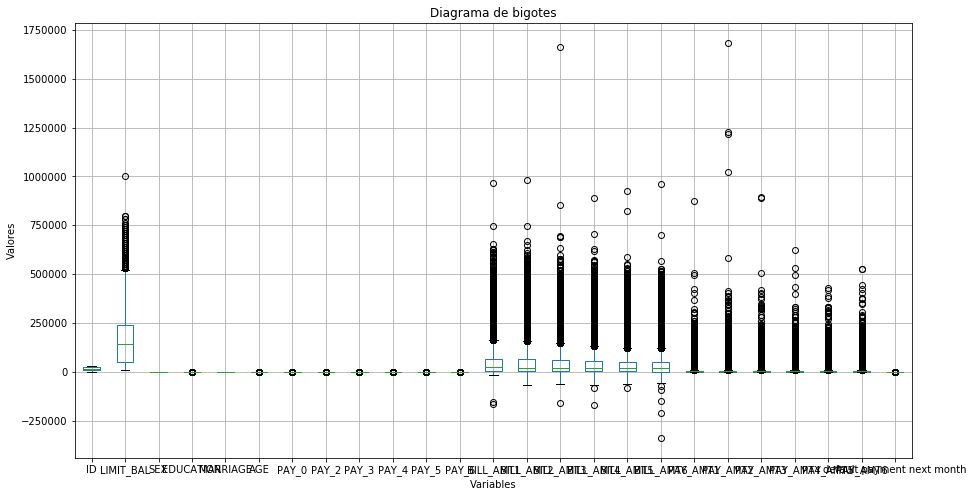

In [6]:
# Diagrama de bigotes (Boxplot) para visualizar la diferencia en los intervalos de las variables

plt.figure(figsize=(15,8))
db.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Diagrama de bigotes')
plt.grid(True)
plt.show()

Dado que la variable categórica se encuentra actualmente expresada de forma variable, para mejorar tanto la visualización como el entendimiento de la misma se decide cambiar estos valores de la siguiente manera. Aquellos registros para los cuales se espera un incumplimiento en los pagos, es decir, los que actualmente se encuentran marcados como "1" serán renombrados "Default", por su parte para aquellos registros para los cuales se espera un pago correcto, es decir los que actualmente se encuentran marcados como "0" serán renombrados "No_default".

In [233]:
# Se agraga la columna "default" que será la nueva variable clasificadora, donde se expresarán
# las categorías de forma cualitativa ségún se informó anteriormente

db["default"] = ""
db["default"][db["default payment next month"] == 0] = "No_default"
db["default"][db["default payment next month"] == 1] = "Default"
    
# Previo a la eliminación de la variable clasificadora original, se procede a renombrarla 
# para facilitar su manejo

db.rename(columns={'default payment next month': 'default_0_1'}, inplace=True) 

In [234]:
# Se contabiliza la frecuencia de la variable clasificadora, es decir la cantidad de casos
# que existen por cada una de las categorías

categoria = pd.Categorical.from_array(db.default)
categoria.describe()

,counts,freqs
categories,,
Default,6636,0.2212
No_default,23364,0.7788


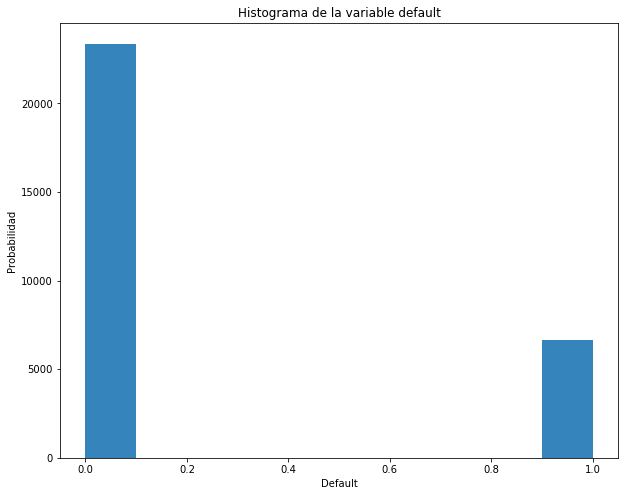

In [237]:
# Se representa de manera gráfica la frecuencia de los casos existentes
# en la variable clasificadora

values = db.default_0_1.values
plt.figure(figsize=(10,8))
plt.hist(x=values, align="mid", alpha= 0.9)
plt.xlabel('Default')
plt.ylabel('Probabilidad')
plt.title('Histograma de la variable default')
plt.show()

Para dar continuidad al modelamiento, es fundamental separar la variable clasificadora del dataset, y así poder realizar el procesamiento sobre las demás variables que conforman la base.

In [10]:
# Creamos la variable "y" a la cual se le asignarán los datos correspondientes
# a la variable clasificadora

y = db.loc[:, "default"]

Como se indicó anteriormente, es necesario realizar el escalamiento de los datos, pero dado que se tienen variables cualitativas y cuantitativas se procede a realizar una separación de las mismas.

In [11]:
# Se lee el nombre de todas las columnas que conforman el dataset

db.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_0_1', 'default'],
      dtype='object')

In [12]:
# Se generan objetos con las variables númericas y categoricas

x_cat = db[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

x_num= db[['LIMIT_BAL', 'AGE', 'BILL_AMT1' , 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
    'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
    'PAY_AMT5', 'PAY_AMT6']]

In [13]:
# Se crea un objeto que contiene los títulos de las variables numéricas

x_num_names = x_num.columns
print(x_num_names)

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


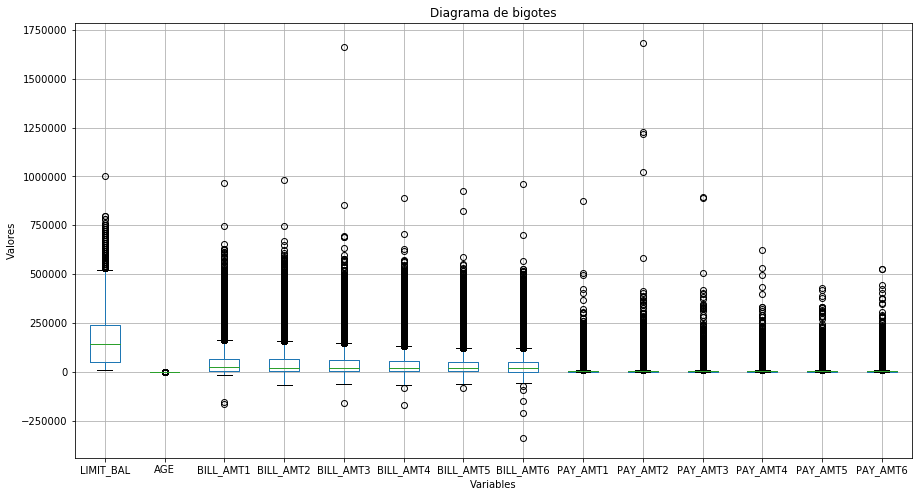

In [14]:
# Nuevamente se realiza el diagrama caja de bigotes pero esta vez solo para las variables
# numéricas, para visualizar su variabilidad eliminando el ruido visual generado por 
# las variables cualitativas

plt.figure(figsize=(15,8))
x_num.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Diagrama de bigotes')
plt.grid(True)
plt.show()

In [15]:
# Se procede a escalar las variables numericas, dada la variabilidad de los datos.

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_num)
x_scaled = pd.DataFrame(x_scaled, columns=x_num_names)

In [16]:
# Se visualizan los datos escalados

x_scaled.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


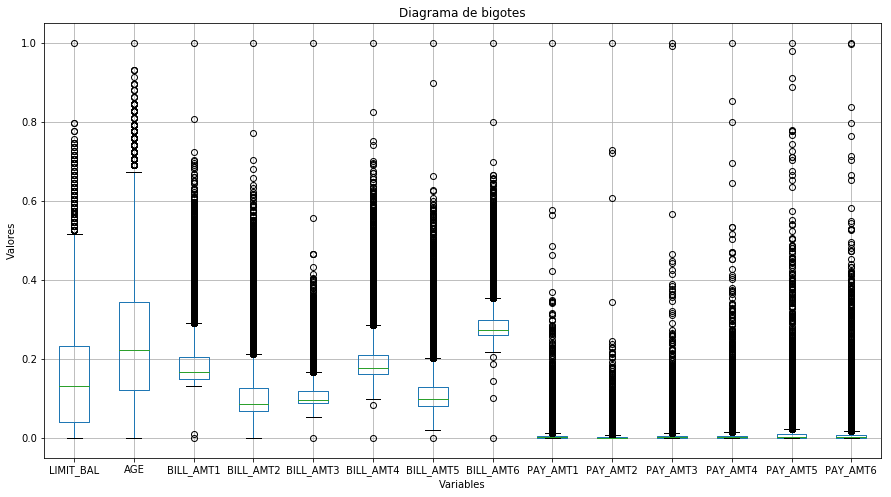

In [17]:
# Se realiza un nuevo diagrama de caja de bigotes para comprobar que ahora todos los datos iteran
# dentro del mismo rango

plt.figure(figsize=(15,8))
x_scaled.boxplot()
plt.xlabel('Variables')
plt.ylabel('Valores')
plt.title('Diagrama de bigotes')
plt.grid(True)
plt.show()

Dado que las variables numércias ya se encuentran escaladas, se procede a unificar nuevamente el dataset, uniendo las variables cuantitativas con las cualitativas.

In [18]:
# Unificación de los dos tipos de variables que contiene el dataset, las categóricas y
# las numéricas que ya se encuentran escaladas

x = x_cat.join(x_scaled)

In [19]:
# Se validan los títulos del objeto "x" para comprobar que todas las variables hayan quedado
# unificadas, ya que será con este objeto con el que se continuará trabajando

x.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

## 4. Modelamiento

Ahora bien, se puede dar inicio a la partición de los datos en los respectivos conjuntos de entrenamiento y prueba, tanto para las variables que conforman el objeto "x" como para los datos que conforman la variable respuesta o clasificadora "y" . Esto se realiza con el objetivo de proceder a validar los modelos que se propondrán en el transcurso del trabajo.

In [21]:
# Partición de los datos


x_train, x_test, y_train_true, y_test_true = train_test_split(
    x, y,      # datos originales
    test_size=0.30,   # float/int, tamaño de la muestra de prueba
    random_state=44)  # semilla del generador aleatorio

# Aplicación de cross validation a los modelos

Como estrategia para la visualización de los resulados, se construye una matriz en la cual se irán consignando las métricas obtenidas en cada uno de los modelos realizados. En la sección de evaluación se realizará la comparación entre los indicadores obtenidos para los modelos.

In [201]:
model_names = ["KNeighbors", "SGD", "DecisionTree", "RandomForest", "SVM"]
cv_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate"])
cv_report

,Accuracy,ErrorRate
KNeighbors,NaN,NaN
SGD,NaN,NaN
DecisionTree,NaN,NaN
RandomForest,NaN,NaN
SVM,NaN,NaN


# Método KNN

In [196]:
clf = KNeighborsClassifier(n_neighbors = 21, weights='uniform', algorithm='auto')
accuracy = cross_val_score(clf, x_train, y_train_true, cv = 5).mean()

In [197]:
Error = 1 - accuracy
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [204]:
fila = [Accuracy, Error]

In [205]:
cv_report.loc["KNeighbors",] = fila
cv_report

,Accuracy,ErrorRate
KNeighbors,0.825333,0.183476
SGD,NaN,NaN
DecisionTree,NaN,NaN
RandomForest,NaN,NaN
SVM,NaN,NaN


# Método Decisión Tree

In [206]:
clf = DecisionTreeClassifier()
accuracy = cross_val_score(clf, x_train, y_train_true, cv = 5).mean()

In [207]:
Error = 1 - accuracy
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [208]:
fila = [Accuracy, Error]

In [209]:
cv_report.loc["DecisionTree",] = fila
cv_report

,Accuracy,ErrorRate
KNeighbors,0.825333,0.183476
SGD,NaN,NaN
DecisionTree,0.825333,0.272238
RandomForest,NaN,NaN
SVM,NaN,NaN


# Método Random Forest

In [220]:
clf = RandomForestClassifier()
accuracy = cross_val_score(clf, x_train, y_train_true, cv = 5).mean()

In [221]:
Error = 1 - accuracy
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [222]:
fila = [Accuracy, Error]

In [223]:
cv_report.loc["RandomForest",] = fila
cv_report

,Accuracy,ErrorRate
KNeighbors,0.825333,0.183476
SGD,NaN,NaN
DecisionTree,0.825333,0.272238
RandomForest,0.825333,0.205809
SVM,NaN,NaN


# Método SGD

In [224]:
clf = SGDClassifier(loss="hinge", penalty="l2")
accuracy = cross_val_score(clf, x_train, y_train_true, cv = 5).mean()

In [225]:
Error = 1 - accuracy
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [226]:
fila = [Accuracy, Error]

In [227]:
cv_report.loc["SGD",] = fila
cv_report

,Accuracy,ErrorRate
KNeighbors,0.825333,0.183476
SGD,0.825333,0.311311
DecisionTree,0.825333,0.272238
RandomForest,0.825333,0.205809
SVM,NaN,NaN


# Se genera matriz para depositar resultados de los modelos

In [164]:
model_names = ["KNeighbors", "SGD", "DecisionTree", "RandomForest", "SVM"]
model_report = pd.DataFrame(data = [], index = model_names, columns = ["Accuracy", "ErrorRate", "Sensitivity", "Specificity", "Jaccard"])
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,NaN,NaN,NaN,NaN,NaN
SGD,NaN,NaN,NaN,NaN,NaN
DecisionTree,NaN,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


# Método KNN

In [165]:
neigh = KNeighborsClassifier(n_neighbors = 21, weights='uniform', algorithm='auto')
neigh.fit(x_train, y_train_true) 
y_test_pred = neigh.predict(x_test)
#print "Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K:21:"

In [166]:
# Computa la tasa de éxito
Accuracy= accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
Error = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [167]:
fila = [Accuracy,Error, sensitivity, specificity, jaccard]

In [168]:
model_report.loc["KNeighbors",] = fila
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,0.816222,0.183778,0.944508,0.364322,0.816222
SGD,NaN,NaN,NaN,NaN,NaN
DecisionTree,NaN,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


In [169]:
confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)

array([[ 725, 1265],
       [ 389, 6621]])

In [170]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred).ravel()
(tn, fp, fn, tp)

(725, 1265, 389, 6621)

# Método SGD

In [171]:
sgd = SGDClassifier(loss="hinge", penalty="l2")
sgd.fit(x_train, y_train_true) 
y_test_pred = sgd.predict(x_test)

In [172]:
Accuracy= accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
Error = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [173]:
fila = [Accuracy,Error, sensitivity, specificity, jaccard]

In [174]:
model_report.loc["SGD",] = fila
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,0.816222,0.183778,0.944508,0.364322,0.816222
SGD,0.786667,0.213333,0.99729,0.0447236,0.786667
DecisionTree,NaN,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


In [175]:
confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)

array([[  89, 1901],
       [  19, 6991]])

In [176]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred).ravel()
(tn, fp, fn, tp)

(89, 1901, 19, 6991)

# Método Decision Tree

In [177]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train_true) 
y_test_pred = tree.predict(x_test)

In [178]:
Accuracy= accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
Error = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [179]:
fila = [Accuracy,Error, sensitivity, specificity, jaccard]

In [180]:
model_report.loc["DecisionTree",] = fila
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,0.816222,0.183778,0.944508,0.364322,0.816222
SGD,0.786667,0.213333,0.99729,0.0447236,0.786667
DecisionTree,0.727556,0.272444,0.815692,0.417085,0.727556
RandomForest,NaN,NaN,NaN,NaN,NaN
SVM,NaN,NaN,NaN,NaN,NaN


In [181]:
confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)

array([[ 830, 1160],
       [1292, 5718]])

In [182]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred).ravel()
(tn, fp, fn, tp)

(830, 1160, 1292, 5718)

# Método Random Forest

In [183]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train_true) 
y_test_pred = rf.predict(x_test)

In [184]:
Accuracy= accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
Error = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [185]:
fila = [Accuracy,Error, sensitivity, specificity, jaccard]

In [186]:
model_report.loc["RandomForest",] = fila
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,0.816222,0.183778,0.944508,0.364322,0.816222
SGD,0.786667,0.213333,0.99729,0.0447236,0.786667
DecisionTree,0.727556,0.272444,0.815692,0.417085,0.727556
RandomForest,0.796556,0.203444,0.903852,0.418593,0.796556
SVM,NaN,NaN,NaN,NaN,NaN


In [187]:
confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)

array([[ 833, 1157],
       [ 674, 6336]])

In [188]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred).ravel()
(tn, fp, fn, tp)

(833, 1157, 674, 6336)

# Método SVM

In [189]:
svm = svm.SVC()
svm.fit(x_train, y_train_true) 
y_test_pred = svm.predict(x_test)

In [190]:
Accuracy= accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
Error = 1 - accuracy_score(y_true = y_test_true, y_pred = y_test_pred)
jaccard= jaccard_similarity_score(y_true=y_test_true, y_pred=y_test_pred)

tn, fp, fn, tp = confusion_matrix(y_test_true, y_test_pred).ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

In [191]:
fila = [Accuracy,Error, sensitivity, specificity, jaccard]

In [192]:
model_report.loc["SVM",] = fila
model_report

,Accuracy,ErrorRate,Sensitivity,Specificity,Jaccard
KNeighbors,0.816222,0.183778,0.944508,0.364322,0.816222
SGD,0.786667,0.213333,0.99729,0.0447236,0.786667
DecisionTree,0.727556,0.272444,0.815692,0.417085,0.727556
RandomForest,0.796556,0.203444,0.903852,0.418593,0.796556
SVM,0.825333,0.174667,0.954779,0.369347,0.825333


In [193]:
confusion_matrix(y_true = y_test_true, y_pred = y_test_pred)

array([[ 735, 1255],
       [ 317, 6693]])

In [194]:
tn, fp, fn, tp = confusion_matrix(y_true=y_test_true, y_pred=y_test_pred).ravel()
(tn, fp, fn, tp)

(735, 1255, 317, 6693)

# 5. Conclusión

<p style="text-align: justify;">

Dentro de los posibles métodos que pudieron ser elegidos para lograr un acercamiento al obetivo propuesto al inicio del documento, el cual consiste, a través de clasificación, lograr un pronósico aceptable del incumplimiento en los pagos a las taretas de créditos en la ciudad de Taiwán, se decide trabaar con 5 modelos ampliamente conocidos  aceptados los cuales fueron desarrollados a lo largo de este trabajo:
<br>
1. KNN
2. SGD
3. Decision Tree
4. Radom Forest
5. SVM
<br>

Con el desarrollo de estos modelos, se logró la obtención de unos inicadores o métricas que permiten identificar cuál es el método que brinda la mayor posibilidad de alcanzar el resultado esperado. Así pues si nos basamos en la métrica Accuracy, la cual puede interpretarse como qué tan bien pronostican los modelos los verdaderos positivos y los verdaderos negativos, el mejor modelo fue el Support Vector Machine (SVM).

Para la rati del error, valor que busca ser minimizado, encontramos que nuevamente el menor valor corresponde al modelo SVM. Ahora validando la métrica de sensibilidad, la cual me indica qué tan bien se pronosticaron específicamente los verdaderos positivos, nuevamente obtenemos el mejor resultado en el indicador SVM. Para la especificidad, la cual indica qué tan bien se pronostican los verdaderos positivos, se obtiene que el mejor modelo es el SVM, aunque su valor es muy cercano al KNN,finalmente el indicador de similitud o distancia Jaccard nuevamente se obtiene una meor medida con el modelo SVM.

Haciendo énfasis en el caso particular de la base de datos de cumplimiento o incumplimiento en los pagos de la obligación financiera tareta de crédito, si se hubieran generado diferencias considerables entre los indicadores de sensibilidad y especificidad, se hubiera tendio que tomar una decisión de qué es más importante para el modelo, poder predecir con mayor acertividad los que pagarán correctamente una cuota o los que dejarán su obligación en mora; de haber sido así probablemente se hubiera requerido el uso de una matriz de costos, para que según se considera en términos generales más relevante, poder predecir quienes no pagarán su obligación a tiempo y se les generará un posible cobro de intereses por mora.